# Laboratorio 7 - Deep Learning

## Autores

- Angel Higueros 20460
- Fredy Velasquez 201011



## Task 1 - Práctica
Considere las arquitecturas conversadas durante la clase, con ello realice una implementación de dos arquitecturas
usando PyTorch
1. Implemente la arquitectura de LeNet-5 para resolver el problema de clasificación del daset de dígitos escritos a mano llamado mnist dataset
2. Implemente la arquitectura de AlexNet para resolver el problema de clasificación usando el dataset de imagenes llamado CIFAR10 dataset.

Para cada implementación defina y justifique (dentro del notebook) una métrica de desempeño. Además responda
(en su notebook) 


Recuerde justificar y/o expandir su respuesta:
- ¿Cuál es la diferencia principal entre ambas arquitecturas?

    - La principal diferencia entre LeNet-5 y AlexNet es su profundidad y complejidad. AlexNet es una red más profunda y contiene más capas convolucionales y totalmente conectadas que LeNet-5.

    - AlexNet utiliza la técnica de Dropout para regularización, mientras que LeNet-5 no lo hace.

    - AlexNet utiliza la función de activación ReLU en lugar de la función sigmoide utilizada en LeNet-5.
    
    - AlexNet utiliza capas de agrupación (pooling) y convoluciones con tamaños de kernel más grandes en comparación con LeNet-5.


- ¿Podría usarse LeNet-5 para un problema como el que resolvió usando AlexNet? ¿Y viceversa?

    - En general, LeNet-5 no sería adecuado para resolver un problema como el de AlexNet en CIFAR-10 debido a su menor profundidad y capacidad limitada para extraer características complejas.

    - Por otro lado, AlexNet podría utilizarse para resolver el problema de clasificación de dígitos escritos a mano en el conjunto de datos MNIST, pero sería una elección excesiva en términos de capacidad de la red para este problema relativamente simple.


- Indique claramente qué le pareció más interesante de cada arquitectura

    - LeNet-5: Lo interesante de LeNet-5 es que fue una de las primeras arquitecturas de CNN desarrolladas y sentó las bases para las redes neuronales convolucionales modernas. A pesar de su simplicidad, pudo lograr buenos resultados en tareas de clasificación de dígitos escritos a mano y abrió el camino para investigaciones posteriores en CNN.

    - AlexNet: Lo más interesante de AlexNet es que marcó un hito importante en el campo de la visión por computadora al ganar el concurso ImageNet en 2012. Fue una de las primeras arquitecturas profundas exitosas y demostró que las CNN podían aprender características útiles de las imágenes a través del entrenamiento profundo. Su éxito revitalizó el interés en las redes neuronales profundas y condujo a avances significativos en el procesamiento de imágenes.




## LeNet-5

In [8]:
#Imports necesarios
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt


Epoch 1/10: Train Loss: 0.2671, Train Acc: 0.9185, Test Acc: 0.9770
Epoch 2/10: Train Loss: 0.0738, Train Acc: 0.9770, Test Acc: 0.9824
Epoch 3/10: Train Loss: 0.0548, Train Acc: 0.9825, Test Acc: 0.9867
Epoch 4/10: Train Loss: 0.0419, Train Acc: 0.9866, Test Acc: 0.9837
Epoch 5/10: Train Loss: 0.0355, Train Acc: 0.9886, Test Acc: 0.9891
Epoch 6/10: Train Loss: 0.0297, Train Acc: 0.9904, Test Acc: 0.9887
Epoch 7/10: Train Loss: 0.0245, Train Acc: 0.9921, Test Acc: 0.9874
Epoch 8/10: Train Loss: 0.0220, Train Acc: 0.9927, Test Acc: 0.9892
Epoch 9/10: Train Loss: 0.0197, Train Acc: 0.9937, Test Acc: 0.9880
Epoch 10/10: Train Loss: 0.0176, Train Acc: 0.9941, Test Acc: 0.9866


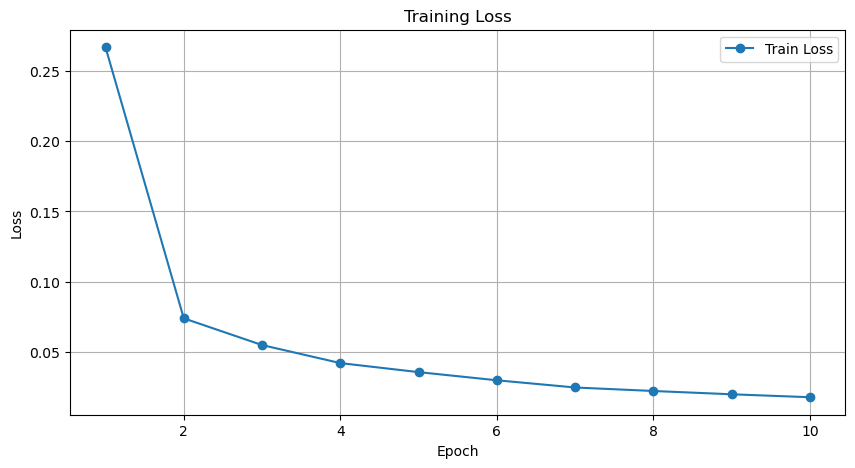

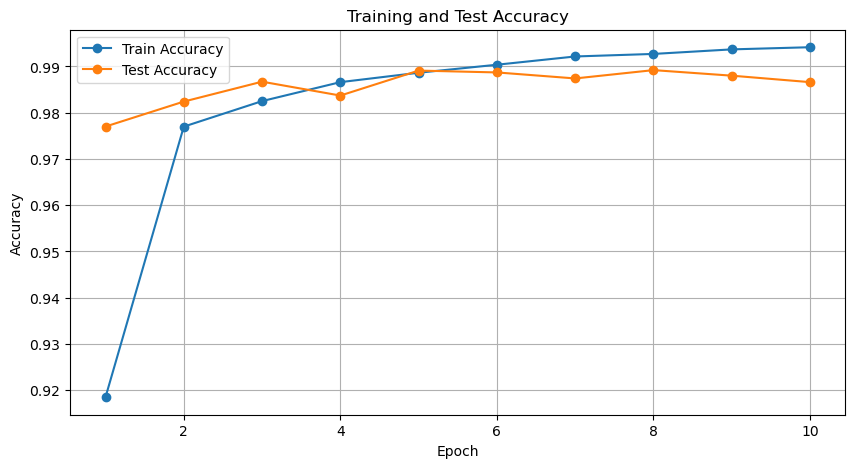

In [10]:
# Definir una transformacion para normalizar las imágenes
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Descargar el conjunto de datos y aplicar transformaciones
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Definir DataLoader para cargar los datos
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Definir la arquitectura de LeNet-5
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Definir una función de entrenamiento y prueba, calcular la precision como metrica
def train(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return total_loss / len(train_loader), correct / total

def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Crear listas vacías para almacenar las métricas
train_losses = []
train_accuracies = []
test_accuracies = []

# Entrenar la red y evaluar la precisión
lenet5 = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lenet5.parameters(), lr=0.001)

for epoch in range(10):
    train_loss, train_acc = train(lenet5, train_loader, criterion, optimizer)
    test_acc = test(lenet5, test_loader)
    print(f'Epoch {epoch + 1}/{10}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

    # Agregar las métricas a las listas
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Gráfico de pérdida de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), train_losses, label='Train Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico de precisión de entrenamiento y prueba
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### Discusion

Train Loss (Pérdida de entrenamiento): La pérdida de entrenamiento disminuye de manera constante a medida que avanzan las épocas, lo cual es un buen indicador. Esto significa que el modelo está mejorando su capacidad para ajustarse a los datos de entrenamiento.

Train Accuracy (Precisión de entrenamiento): La precisión de entrenamiento aumenta a medida que avanzan las épocas, lo cual es una señal positiva. El modelo está aprendiendo y ajustándose cada vez mejor a los datos de entrenamiento.

Test Accuracy (Precisión de prueba): La precisión en el conjunto de prueba también aumenta y se estabiliza en un valor alto alrededor de la época 3. Esto indica que el modelo generaliza bien a datos que no ha visto durante el entrenamiento.

Resultados generales: En general, los resultados son muy buenos. El modelo LeNet-5 logra una precisión muy alta en el conjunto de prueba, superando el 98% de precisión. Esto significa que es capaz de clasificar con precisión la mayoría de los dígitos escritos a mano en el conjunto de prueba.

## AlexNet

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt


In [2]:
# Definir una transformación para normalizar las imágenes
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomCrop(32, padding=4),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
# Descargar el conjunto de datos CIFAR-10 y aplicar transformaciones
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Definir DataLoader para cargar los datos
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 170498071/170498071 [00:13<00:00, 13097622.91it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
# Definir la arquitectura de AlexNet
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
                nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),  # Modificada para imágenes de 32x32
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=3, stride=2),
                nn.Conv2d(64, 192, kernel_size=5, padding=2),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=3, stride=2),
                nn.Conv2d(192, 384, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(384, 256, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(256, 256, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

In [5]:
# Función para entrenar el modelo
def train(model, train_loader, criterion, optimizer):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    accuracy = 100 * correct / total
    return train_loss, accuracy

In [6]:
# Función para evaluar el modelo en el conjunto de prueba
def test(model, test_loader):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

In [7]:
# Entrenar la red y evaluar la precisión
alexnet = AlexNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)

# Crear listas vacías para almacenar las métricas
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(10):
    train_loss, train_acc = train(alexnet, train_loader, criterion, optimizer)
    test_acc = test(alexnet, test_loader)
    print(f'Epoch {epoch + 1}/{10}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

    # Agregar las métricas a las listas
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Gráfico de pérdida de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), train_losses, label='Train Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico de precisión de entrenamiento y prueba
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.grid(True)
plt.legend()
plt.show()


Epoch 1/10: Train Loss: 1471.5072, Train Acc: 26.0740, Test Acc: 35.7200
Epoch 2/10: Train Loss: 1183.8618, Train Acc: 43.0380, Test Acc: 45.6100
Epoch 3/10: Train Loss: 1065.1859, Train Acc: 49.7860, Test Acc: 54.5300
Epoch 4/10: Train Loss: 984.6476, Train Acc: 54.7980, Test Acc: 57.6000
Epoch 5/10: Train Loss: 929.8889, Train Acc: 57.5440, Test Acc: 57.5800
Epoch 6/10: Train Loss: 884.8912, Train Acc: 59.8940, Test Acc: 61.0600
Epoch 7/10: Train Loss: 856.6720, Train Acc: 61.1980, Test Acc: 62.2700
Epoch 8/10: Train Loss: 830.7818, Train Acc: 62.4940, Test Acc: 61.6300
Epoch 9/10: Train Loss: 812.3082, Train Acc: 63.8080, Test Acc: 64.6700
Epoch 10/10: Train Loss: 793.0975, Train Acc: 64.5100, Test Acc: 65.7900


### Discusion

Precisión en el Conjunto de Prueba: La precisión en el conjunto de prueba ha experimentado una mejora significativa a lo largo del entrenamiento. Comenzó en alrededor del 35.72% en la primera época y aumentó a aproximadamente el 65.79% en la décima época. Este aumento en la precisión demuestra que la red ha aprendido a extraer características útiles de las imágenes y a realizar predicciones más precisas.

Reducción de la Pérdida de Entrenamiento: La pérdida de entrenamiento también ha disminuido de manera constante a medida que avanzan las épocas. Esto indica que la red está ajustando sus pesos para minimizar la pérdida y se está acercando a una convergencia.

Convergencia: La red parece haber convergido a una solución aceptable, ya que la mejora en la precisión se ha vuelto más gradual en las últimas épocas y la pérdida se ha estabilizado.

Rendimiento Prometedor: Con una precisión en el conjunto de prueba del 65.79%, la red está demostrando un rendimiento prometedor en la tarea de clasificación de imágenes en el conjunto de datos CIFAR-10.

## Task 2 - Teoría
Responda claramente y con una extensión adecuada las siguientes preguntas:
1. Investigue e indique en qué casos son útiles las siguientes arquitecturas, agregue imagenes si esto le ayuda a una mejor comprensión
- GoogleNet (Inception)

La arquitectura GoogleNet es útil en casos donde se busca una red profunda con una computación eficiente. Su característica distintiva es el uso de módulos de "inception" que consisten en múltiples convoluciones y concatenaciones de características de diferentes tamaños de kernel en paralelo. Esto permite que la red capture características a diferentes escalas y resoluciones, lo que es útil en tareas de clasificación de imágenes, detección de objetos y segmentación semántica. GoogleNet es especialmente efectiva en la optimización de uso de recursos computacionales.

- DenseNet (Densely Connected Convolutional Networks)

DenseNet es útil cuando se busca una arquitectura que promueva conexiones densas entre capas. En lugar de tener conexiones dispersas entre capas, como en las CNN tradicionales, DenseNet conecta todas las capas entre sí. Esto fomenta el flujo de información a lo largo de la red y facilita el aprendizaje de características complejas y la mitigación del problema de desvanecimiento de gradientes. DenseNet es beneficioso para la clasificación de imágenes, detección de objetos y segmentación de imágenes.

- MobileNet

MobileNet es útil en casos donde se requiere una red ligera y eficiente en términos de recursos computacionales, como en aplicaciones móviles o dispositivos con recursos limitados. Esta arquitectura utiliza convoluciones separables en profundidad (depthwise separable convolutions) para reducir la cantidad de operaciones y parámetros, sin sacrificar demasiado la precisión. MobileNet es ideal para la clasificación de imágenes en dispositivos móviles y la detección en tiempo real.

- EfficientNet

EfficientNet es útil en situaciones donde se busca un equilibrio óptimo entre el rendimiento y la eficiencia computacional. Esta arquitectura utiliza un enfoque de búsqueda en escalas compuestas para encontrar el tamaño de modelo adecuado para una tarea dada, escalando la profundidad, el ancho y la resolución de la red de manera equilibrada. EfficientNet ha demostrado ser altamente eficiente en términos de rendimiento de precisión en una amplia gama de tareas de visión por computadora, incluida la clasificación de imágenes y la detección de objetos.

2. ¿Cómo la arquitectura de transformers puede ser usada para image recognition?

La arquitectura de Transformers, que se originó en el procesamiento de lenguaje natural (NLP), también se puede utilizar para el reconocimiento de imágenes. Esto se logra mediante la adaptación de la arquitectura Transformer original para el procesamiento de secuencias de texto a la tarea de procesar matrices de imágenes.

El enfoque principal para usar Transformers en el reconocimiento de imágenes se llama "Transformers para visión" o "Vision Transformers". La idea central es tratar una imagen como una secuencia de parches (patches), donde cada parche es una porción de la imagen. Cada parche se representa como un vector y se pasa a través de la arquitectura Transformer.

Usar Transformer con imagenes: 

División de la imagen en parches: La imagen se divide en una cuadrícula de parches, y cada parche se transforma en un vector de características.
Posición de codificación: Se agrega información de posición a los vectores de características de los parches, similar a cómo se manejan las secuencias en NLP.
Capas de atención multiatención: Se aplican capas de atención multiatención (self-attention) para permitir que los parches se relacionen entre sí.
Redes completamente conectadas: Después de las capas de atención, se utilizan capas de redes neuronales completamente conectadas para realizar la clasificación.
Esta arquitectura ha demostrado ser efectiva en una variedad de tareas de visión por computadora, incluido el reconocimiento de objetos, la detección de objetos y la segmentación semántica. Un ejemplo de implementación de Vision Transformer (ViT) en PyTorch se encuentra en la biblioteca "PyTorch Vision" de Hugging Face.
